In [77]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import spacy
import seaborn as sns
import matplotlib.pyplot as plt
nlp = spacy.load('de_core_news_sm')

standard_scaling = True
percentage_scaling = True

parties = [
    'afd',
    'cdu_csu',
    'fdp',
    'spd',
    'grüne',
    'linke',
]

media = [
    'junge Welt',
    "NachDenkSeiten",
    'taz',
    'Süddeutsche Zeitung',
    'stern TV',
    "DER SPIEGEL",
    'Der Tagesspiegel',
    'ARD',
    #'Tagesschau',
    'ZDF',
    "ZDFheute Nachrichten",
    'Bayerischer Rundfunk',
    'ntv Nachrichten',
    'RTL',
    'FOCUS Online',
    'ZEIT ONLINE',
    'faz',
    'WELT',
    "BILD",
    'NZZ Neue Zürcher Zeitung',
    "Junge Freiheit",
    'COMPACTTV'
]

df = pd.read_pickle('../data/topic.pkl')
df['contains_cdu'] = df['preprocessed'].str.contains('cdu')
df['contains_csu'] = df['preprocessed'].str.contains('csu')
df['contains_fdp'] = df['preprocessed'].str.contains('fdp')
df['contains_grüne'] = df['preprocessed'].str.contains('grüne') 
df['contains_linke'] = df['preprocessed'].str.contains('linke')
df['contains_afd'] = df['preprocessed'].str.contains('afd') | df['preprocessed'].str.contains('afg')
df['contains_spd'] = df['preprocessed'].str.contains('spd')
df['contains_party'] = df['contains_cdu'] | df['contains_csu'] | df['contains_fdp'] | df['contains_grüne'] | df['contains_linke'] | df['contains_afd'] | df['contains_spd'] 

In [78]:
mentions_by_media = df.groupby(['medium'])[['contains_afd', 'contains_cdu', 'contains_csu', 'contains_fdp', 'contains_spd', 'contains_grüne', 'contains_linke']].sum()
mentions_by_media = mentions_by_media.loc[media].transpose()

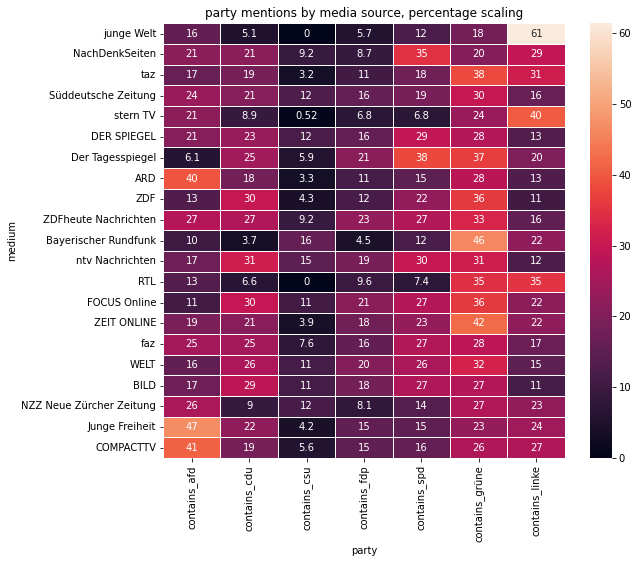

In [83]:
if percentage_scaling:
    mentions_by_media_scaled = mentions_by_media.copy(deep=True)
    for medium in media:
        party_mentions_by_medium = ((df['medium'] == medium).to_numpy() & df['contains_party'].to_numpy()).sum()
        mentions_by_media_scaled[medium] = mentions_by_media_scaled[medium] / party_mentions_by_medium * 100.0
    mentions_by_media_scaled = mentions_by_media_scaled.transpose()
    f, ax = plt.subplots(figsize=(9, 8))
    sns.heatmap(mentions_by_media_scaled, annot=True, linewidths=.5, ax=ax)
    ax.set(xlabel='party', ylabel='medium', title='party mentions by media source, percentage scaling')

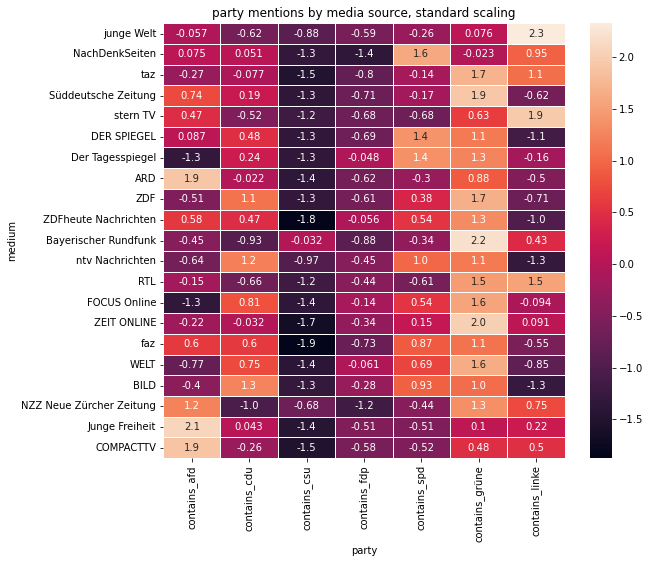

In [80]:
if standard_scaling:
    scaler = StandardScaler()
    mentions_by_media_scaled = mentions_by_media.copy(deep=True)
    mentions_by_media_scaled = pd.DataFrame(scaler.fit_transform(mentions_by_media_scaled), columns=mentions_by_media_scaled.columns, index=mentions_by_media_scaled.index).transpose()
    f, ax = plt.subplots(figsize=(9, 8))
    sns.heatmap(mentions_by_media_scaled, annot=True, fmt=".2", linewidths=.5, ax=ax)
    ax.set(xlabel='party', ylabel='medium', title='party mentions by media source, standard scaling')